In [1]:
from xtquant import xtdata
import matplotlib.pyplot as plt
import akshare as ak
import numpy as np
from datetime import datetime
import time
import tushare as ts
import pandas as pd

***<font color=steel
    size=5
       face=雅黑>
<mark>沪深成交量</mark>
</font>***

In [3]:
for sector in xtdata.get_stock_list_in_sector('沪深指数'):
    detail = xtdata.get_instrument_detail(sector)
    name = detail['InstrumentName']
    if name in ['上证指数', '深证成指']:
        print(sector)
    if '沪深300' in name:
        print(sector, name)


***** xtdata连接成功 *****
服务信息: {'tag': 'sp3', 'version': '1.0'}
服务地址: 127.0.0.1:58610
数据路径: D:\国金QMT交易端模拟\bin.x64/../userdata_mini/datadir
设置xtdata.enable_hello = False可隐藏此消息

000300.SH 沪深300
000001.SH
399001.SZ
399300.SZ 沪深300


In [4]:
def get_index_data(xt_sector_index, st, et, cnt, ped):
    # 订阅合约数据
    xtdata.subscribe_quote(xt_sector_index, period=ped, start_time= st, end_time=et, count=cnt, callback=None)
    # 下载指定合约历史行情
    xtdata.download_history_data(xt_sector_index, ped, st, et)
    # 获取指定合约历史行情
    day_data = xtdata.get_market_data_ex(field_list=[], stock_list=[xt_sector_index], period=ped, 
                                         start_time=st,end_time=et,  count=cnt, dividend_type='none', fill_data=True)
    return day_data[xt_sector_index]

In [6]:
st = '20100101'
#et = '20241217'
et = datetime.now().strftime('%Y%m%d')
#et = '20241217'
print(st, et)
cnt = 100
ped = '1d'

sh_mkt_data = get_index_data('000001.SH', st, et, cnt, ped)
sz_mkt_data = get_index_data('399001.SZ', st, et, cnt, ped)

20100101 20250523


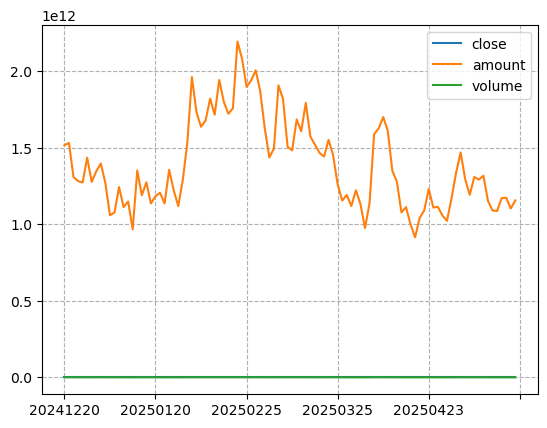

In [7]:
total_mkt_data = sz_mkt_data[['close', 'amount', 'volume']] + sh_mkt_data[['close', 'amount', 'volume']]
total_mkt_data.plot()
plt.grid(ls='--')

In [8]:
sz_mkt_data.tail(10)

,time,open,high,low,close,volume,amount,settelementPrice,openInterest,preClose,suspendFlag
20250512,1746979200000,10220.330,10302.046,10200.206,10301.158,595059405,7.863403e+11,0.0,15,10126.825,0
20250513,1747065600000,10401.945,10401.945,10274.340,10288.083,613388689,7.849412e+11,0.0,15,10301.158,0
20250514,1747152000000,10278.907,10418.440,10240.133,10354.222,622584786,7.818732e+11,0.0,15,10288.083,0
20250515,1747238400000,10324.843,10324.843,10186.448,10186.448,571421816,6.911130e+11,0.0,15,10354.222,0
20250516,1747324800000,10157.682,10217.908,10152.771,10179.596,541239329,6.538961e+11,0.0,15,10186.448,0
20250519,1747584000000,10171.291,10184.402,10090.296,10171.090,553941510,6.492957e+11,0.0,15,10179.596,0
20250520,1747670400000,10182.247,10273.592,10151.865,10249.173,599599479,7.194122e+11,0.0,15,10171.090,0
20250521,1747756800000,10246.515,10325.925,10243.183,10294.220,579900581,7.075208e+11,0.0,15,10249.173,0
20250522,1747843200000,10274.676,10283.295,10214.497,10219.622,557473920,6.643551e+11,0.0,15,10294.221,0
20250523,1747929600000,10210.616,10294.566,10132.412,10132.412,562096510,6.870013e+11,0.0,15,10219.621,0


In [9]:
total_mkt_data['year'] = total_mkt_data.index.to_series().apply(lambda x: x[:4])
total_mkt_data['month'] = total_mkt_data.index.to_series().apply(lambda x: x[4:6])
total_mkt_data[total_mkt_data.index >= '20230901'].groupby(['year', 'month'])['amount'].mean()
total_mkt_data[total_mkt_data.index >= '20240901']
sh_mkt_data[sh_mkt_data.index >= '20240901']
#sz_mkt_data[sz_mkt_data.index >= '20240901']

,time,open,high,low,close,volume,amount,settelementPrice,openInterest,preClose,suspendFlag
20241220,1734624000000,3364.481,3390.618,3362.819,3368.069,490964621,5.968219e+11,0.0,0,3370.033,0
20241223,1734883200000,3367.904,3384.992,3348.277,3351.257,556747248,6.231178e+11,0.0,0,3368.069,0
20241224,1734969600000,3353.535,3394.904,3352.947,3393.528,471992673,5.307580e+11,0.0,0,3351.257,0
20241225,1735056000000,3395.107,3406.212,3374.011,3393.350,471315592,5.221682e+11,0.0,0,3393.528,0
20241226,1735142400000,3389.338,3401.095,3380.255,3398.077,422177271,5.189370e+11,0.0,0,3393.350,0
...,...,...,...,...,...,...,...,...,...,...,...
20250519,1747584000000,3365.882,3373.599,3356.648,3367.583,403074805,4.371776e+11,0.0,0,3367.462,0
20250520,1747670400000,3371.689,3387.804,3369.963,3380.478,405544534,4.502905e+11,0.0,0,3367.583,0
20250521,1747756800000,3380.209,3394.754,3380.209,3387.573,412496165,4.659570e+11,0.0,0,3380.478,0
20250522,1747843200000,3381.865,3390.592,3376.233,3380.188,394217206,4.383345e+11,0.0,0,3387.573,0


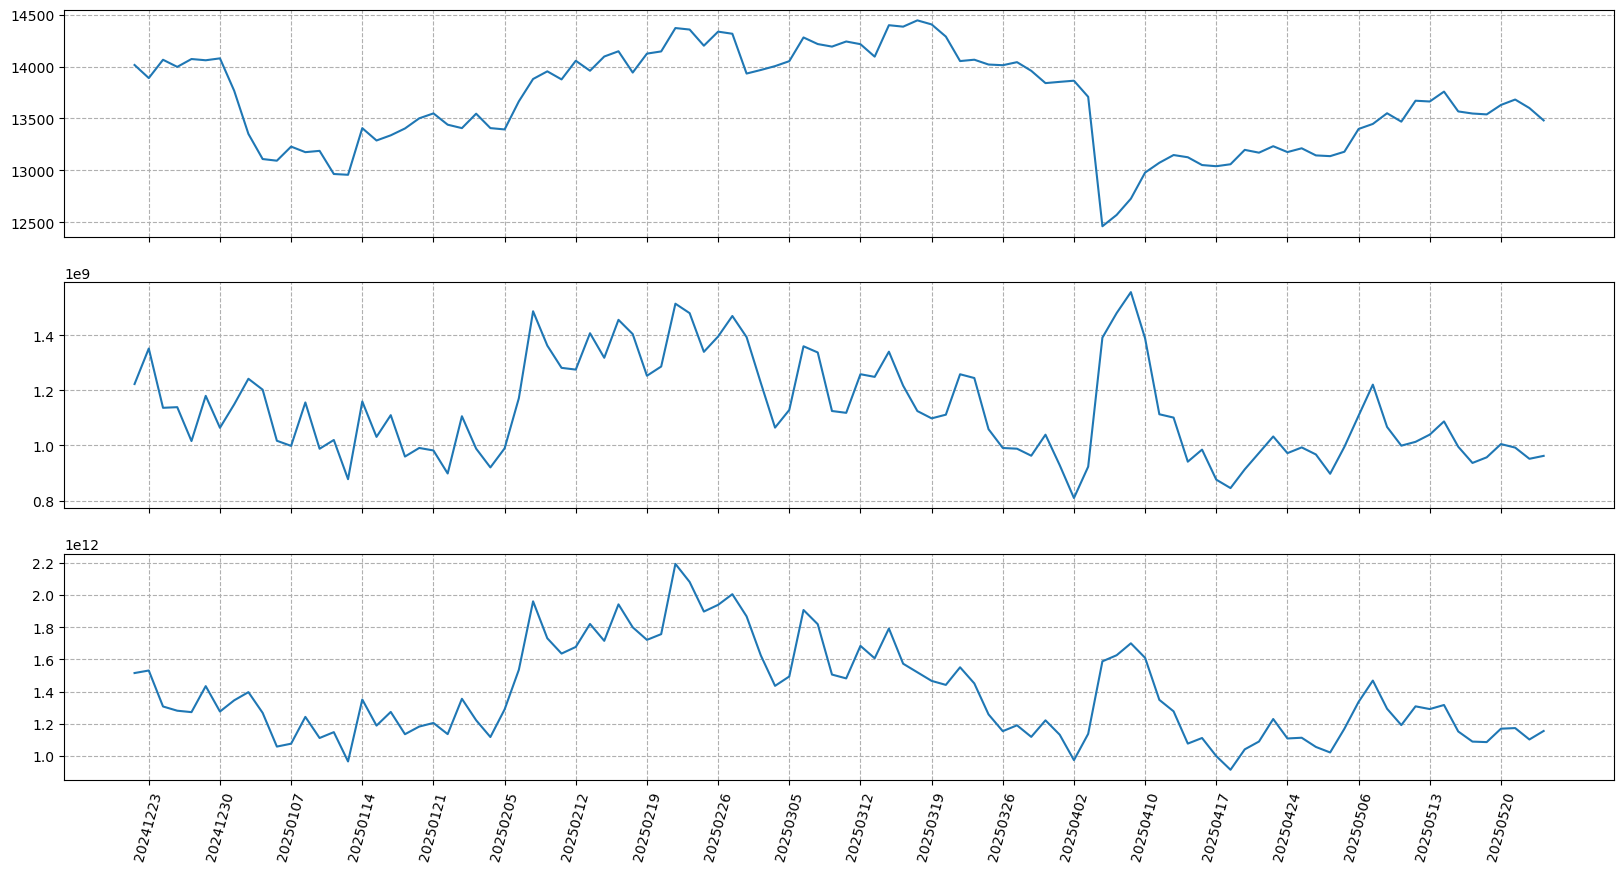

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt_data = total_mkt_data[total_mkt_data.index >= "20230901"]
t = np.arange(0.01, 5.0, 0.01)
t = plt_data.index
s1 = plt_data['close']
s2 = plt_data['volume']
s3 = plt_data['amount']
#s1 = np.sin(2 * np.pi * t)
#s2 = np.exp(-t)
#s3 = np.sin(4 * np.pi * t)
plt.figure(figsize=(20,10))
ax1 = plt.subplot(311)
plt.plot(t, s1)
plt.grid(ls='--')
plt.tick_params('x', labelbottom=False)

# share x only
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(t, s2)
plt.grid(ls='--')
# make these tick labels invisible
plt.tick_params('x', labelbottom=False)

ax3 = plt.subplot(313, sharex=ax1)
plt.plot(t, s3)
plt.grid(ls='--')
# make these tick labels invisible
plt.tick_params('x', labelsize=10)

# share x and y
#ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
#plt.plot(t, s3)
#plt.xlim(0.01, 150.0)
plt.xticks(range(1, len(t), 5), rotation=75)
plt.show()

In [21]:
plt_data.tail(60)

,close,amount,volume,year,month
20250225,14200.536,1.896762e+12,1340369026,2025,02
20250226,14335.863,1.938345e+12,1396145854,2025,02
20250227,14315.570,2.004585e+12,1470566229,2025,02
20250228,13932.137,1.867024e+12,1393899622,2025,02
20250303,13966.517,1.624676e+12,1227486844,2025,03
20250304,14003.645,1.435578e+12,1065007391,2025,03
20250305,14051.425,1.493815e+12,1129236057,2025,03
20250306,14279.849,1.906457e+12,1360543736,2025,03
20250307,14216.279,1.818239e+12,1338031675,2025,03
20250310,14191.868,1.505660e+12,1125307095,2025,03


In [11]:
#total_mkt_data[(total_mkt_data.index >= "20240901") & (total_mkt_data.index <= "202400910") ]
#plt_data.tail(60)
#[5 for _ in range(10)]
#table = ''.maketrans('abcw', 'xyzc')
#print('Hellow world'.translate(table))
min_ret = float('inf')
for i in range(404):
    tmp = 2021-5*i
    if tmp % 7 == 0:
        ret = i + tmp/7
        if ret < min_ret:
            min_ret = ret
            print('result')
            print(i)
            print(tmp/7)
            print(min_ret)

result
1
288.0
289.0


***<font color=steel
    size=5
       face=雅黑>
<mark>国债</mark>
</font>***

In [22]:
bond_zh_us_rate_df = ak.bond_zh_us_rate(start_date="20000101")
print(bond_zh_us_rate_df)

              日期  中国国债收益率2年  中国国债收益率5年  中国国债收益率10年  中国国债收益率30年  中国国债收益率10年-2年  \
0     2000-01-03        NaN        NaN         NaN         NaN            NaN   
1     2000-01-04        NaN        NaN         NaN         NaN            NaN   
2     2000-01-05        NaN        NaN         NaN         NaN            NaN   
3     2000-01-06        NaN        NaN         NaN         NaN            NaN   
4     2000-01-07        NaN        NaN         NaN         NaN            NaN   
...          ...        ...        ...         ...         ...            ...   
6723  2025-05-13     1.4167     1.5421      1.6704      1.8790         0.2537   
6724  2025-05-14     1.4356     1.5622      1.6736      1.8775         0.2380   
6725  2025-05-15     1.4540     1.5770      1.6798      1.8825         0.2258   
6726  2025-05-16     1.4749     1.5770      1.6793      1.8780         0.2044   
6727  2025-05-19     1.4645     1.5672      1.6893      1.8610         0.2248   

      中国GDP年增率  美国国债收益率2年  

In [63]:
bond_zh_us_rate_df.to_csv('bond_zh_us_rate_df_1990.csv')


In [24]:
bond_zh_us_rate_df.columns
bond_rate_overall_df = bond_zh_us_rate_df[['日期', '中国国债收益率10年','中国国债收益率30年','中国GDP年增率','美国国债收益率10年','美国国债收益率30年','美国GDP年增率']]
bond_rate_overall_df.columns = ['date', 'cn_bond_10', 'cn_bond_30', 'cn_gdp', 'us_bond_10', 'us_bond_30', 'us_gdp']
bond_rate_overall_df = bond_rate_overall_df.set_index(keys='date')

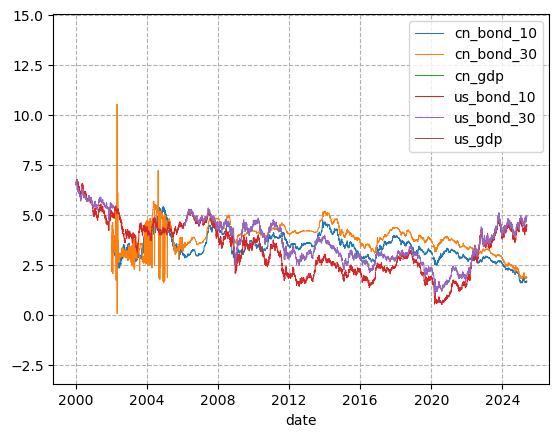

In [26]:
bond_rate_overall_df.plot(linewidth=0.75)
plt.grid(ls='--')
#y_ticks = np.arange(-5, 15, 1)
#plt.yticks(y_ticks)
plt.show()

In [36]:
bond_zh_us_rate_df.columns
bond_rate_cn_df = bond_zh_us_rate_df[['日期', '美国国债收益率10年','中国国债收益率30年']]
bond_rate_cn_df.columns = ['date', 'us_bond_10', 'cn_bond_30']
bond_rate_cn_df = bond_rate_cn_df.set_index(keys='date')

In [40]:
bond_rate_cn_df

,us_bond_10,cn_bond_30
date,,
2000-01-03,6.58,NaN
2000-01-04,6.49,NaN
2000-01-05,6.62,NaN
2000-01-06,6.57,NaN
2000-01-07,6.52,NaN
...,...,...
2025-05-13,4.49,1.8790
2025-05-14,4.53,1.8775
2025-05-15,4.45,1.8825


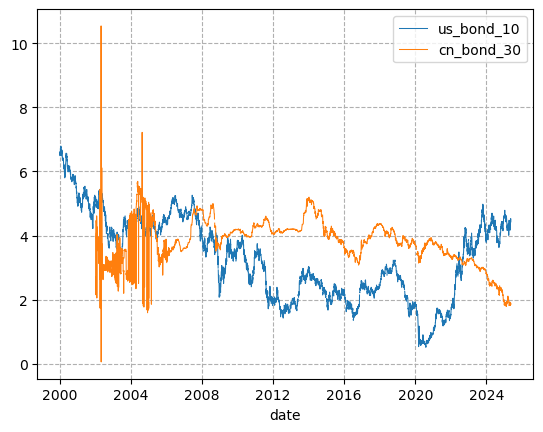

In [38]:
bond_rate_cn_df.plot(linewidth=0.75)
plt.grid(ls='--')
plt.show()

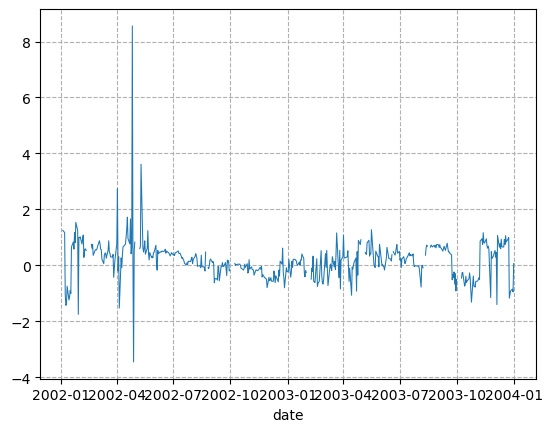

In [32]:
from datetime import datetime
bond_rate_cn_df['rate_gap'] = bond_rate_cn_df['cn_bond_30'] - bond_rate_cn_df['cn_bond_10']
bond_rate_cn_df[bond_rate_cn_df.index <= datetime.date(datetime.strptime("20040101", "%Y%m%d"))]['rate_gap'].plot(linewidth=0.75)
#plt.plot()
plt.grid(ls='--')
plt.show()

In [69]:
print(bond_rate_cn_df[(bond_rate_cn_df.index <= datetime.date(datetime.strptime("20020510", "%Y%m%d"))) 
      & (bond_rate_cn_df.index >= datetime.date(datetime.strptime("20020401", "%Y%m%d")))]['cn_bond_30'].dropna())

date
2002-04-01     3.5140
2002-04-02     5.4377
2002-04-03     2.7164
2002-04-04     3.0381
2002-04-05     1.7409
2002-04-08     2.9983
2002-04-09     2.7108
2002-04-10     3.0818
2002-04-11     3.3297
2002-04-12     3.3509
2002-04-15     3.3989
2002-04-16     3.5825
2002-04-17     3.8966
2002-04-18     4.2481
2002-04-19     3.5369
2002-04-22     3.3542
2002-04-23     4.2216
2002-04-24     3.0176
2002-04-25     3.1625
2002-04-26    10.5366
2002-04-27     2.7586
2002-04-28     0.0637
2002-04-29     3.0567
2002-04-30     3.3321
2002-05-08     3.1324
2002-05-09     3.1961
2002-05-10     6.1136
Name: cn_bond_30, dtype: float64


In [ ]:
#while True:
#    hour = datetime.now().hour
#    if (hour >= 9 and hour < 12) or (hour >= 13 and hour < 18):
#        fx_quote_baidu_df = ak.fx_quote_baidu(symbol="美元")
#        #print(fx_quote_baidu_df)
#        #fx_quote_baidu_df[fx_quote_baidu_df.apply(lambda x: x["代码"] in ('USDCNY', 'USDCNH', 'USDJPY', 'USDEUR', 'USDGBP', 'USDAUD', 'USDRUB', 'USDKRW' ), axis=1)]
#        fx_key_quote = fx_quote_baidu_df[fx_quote_baidu_df.apply(lambda x: x["代码"] in ('USDCNY', 'USDCNH', 'USDJPY' ), axis=1)]
#        if fx_key_quote[fx_key_quote["代码"] == 'USDCNH']['最新价'].values[0] >= 7.30:
#            alert_email('MarsFinance', 'Allen', 'USD/CNH FX rate', '离岸人民币兑美元汇率突破7.3')
#        time.sleep(600)
#    else:
#        time.sleep(6000)
#        


***<font color=steel
    size=5
       face=雅黑>
<mark>外汇</mark>
</font>***

In [42]:
#fx_quote_baidu_df = fx_quote_baidu_df.set_index("代码")
import akshare as ak

fx_spot_quote_df = ak.fx_spot_quote()
print(fx_spot_quote_df)

           货币对        买报价        卖报价
0      USD/CNY    7.21440    7.21530
1      EUR/CNY    8.12320    8.12540
2   100JPY/CNY    4.97810    4.97920
3      HKD/CNY    0.92258    0.92282
4      GBP/CNY    9.64500    9.64690
5      AUD/CNY    4.64870    4.65030
6      NZD/CNY    4.26470    4.26610
7      SGD/CNY    5.57240    5.57420
8      CHF/CNY    8.65730    8.66050
9      CAD/CNY    5.17600    5.17760
10     CNY/MOP    1.11670    1.11780
11     CNY/MYR    0.59360    0.59750
12     CNY/RUB   11.03760   11.28030
13     CNY/ZAR    2.50360    2.50420
14     CNY/KRW  192.86000  193.16000
15     CNY/AED    0.50890    0.50925
16     CNY/SAR    0.51974    0.51998
17     CNY/HUF   49.45920   49.46990
18     CNY/PLN    0.52480    0.52531
19     CNY/DKK    0.91820    0.91860
20     CNY/SEK    1.34120    1.34210
21     CNY/NOK    1.42680    1.42780
22     CNY/TRY    5.38290    5.38569
23     CNY/MXN    2.69170    2.69330
24     CNY/THB    4.57730    4.58310


In [94]:
pip install lib-pybroker -i https://pypi.tuna.tsinghua.edu.cn/simple


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 0.0/118.6 kB ? eta -:--:--
     ------------------------------------ - 112.6/118.6 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 118.6/118.6 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/121.7 kB ? eta -:--:--
     -------------------------------------- 121.7/121.7 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/45.5 kB ? eta -:--:--
     ---------------------------------------- 45.5/45.5 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/2.8 MB ? eta -:--:--


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.19.0 requires markdown>=2.6.8, which is not installed.
tensorboard 2.19.0 requires werkzeug>=1.0.1, which is not installed.
tensorflow 2.19.0 requires wrapt>=1.11.0, which is not installed.
tensorflow 2.19.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 6.31.0 which is incompatible.


In [44]:
currency_boc_safe_df = ak.currency_boc_safe()
print(currency_boc_safe_df[['日期', '美元', '欧元', '日元', '英镑']])

              日期      美元      欧元      日元      英镑
0     1994-01-01  870.00     NaN  7.7800     NaN
1     1994-01-03  870.00     NaN  7.7800     NaN
2     1994-01-04  870.00     NaN  7.7196     NaN
3     1994-01-05  870.00     NaN  7.7196     NaN
4     1994-01-06  870.00     NaN  7.7196     NaN
...          ...     ...     ...     ...     ...
7718  2025-05-13  719.91  800.17  4.8633  950.47
7719  2025-05-14  719.56  803.58  4.8700  955.33
7720  2025-05-15  719.63  805.64  4.9184  955.42
7721  2025-05-16  719.38  805.73  4.9494  957.85
7722  2025-05-19  719.16  805.50  4.9593  957.76

[7723 rows x 5 columns]


In [8]:
currency_boc_safe_df

,日期,美元,欧元,日元,港元,英镑,澳元,新西兰元,新加坡元,瑞士法郎,...,里亚尔,福林,兹罗提,丹麦克朗,瑞典克朗,挪威克朗,里拉,比索,泰铢,澳门元
0,1994-01-01,870.00,NaN,7.7800,112.660,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1994-01-03,870.00,NaN,7.7800,112.660,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1994-01-04,870.00,NaN,7.7196,112.660,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1994-01-05,870.00,NaN,7.7196,112.660,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1994-01-06,870.00,NaN,7.7196,112.660,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7717,2025-05-12,720.66,810.74,4.9546,92.639,959.15,463.93,427.99,556.37,865.38,...,51.952,4978.96,52.188,92.04,134.57,143.60,536.245,269.39,457.14,111.27
7718,2025-05-13,719.91,800.17,4.8633,92.374,950.47,459.80,422.70,552.49,853.55,...,52.002,5064.70,53.009,93.22,136.19,144.86,537.875,272.25,462.89,111.56
7719,2025-05-14,719.56,803.58,4.8700,92.286,955.33,464.68,426.31,552.25,855.70,...,52.231,5027.91,52.740,92.87,135.37,144.27,540.003,270.18,462.83,111.67
7720,2025-05-15,719.63,805.64,4.9184,92.209,955.42,463.18,425.23,553.87,856.33,...,52.064,5001.67,52.497,92.62,135.34,144.02,537.973,269.14,462.97,111.76


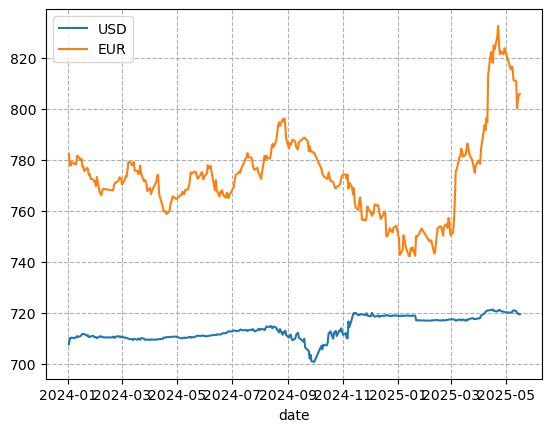

In [9]:
fx_cny_df = currency_boc_safe_df[['日期', '美元', '欧元', '日元', '英镑', '韩元', '卢布']]
fx_cny_df.columns = ['date', 'USD', 'EUR', 'JPY', 'GBP', 'KRW', 'RUB']
fx_cny_df = fx_cny_df.set_index(keys='date')
fx_cny_df[fx_cny_df.index >= datetime.date(datetime.strptime("20240101", "%Y%m%d"))][['USD', 'EUR']].plot()
plt.grid(ls='--')
plt.show()

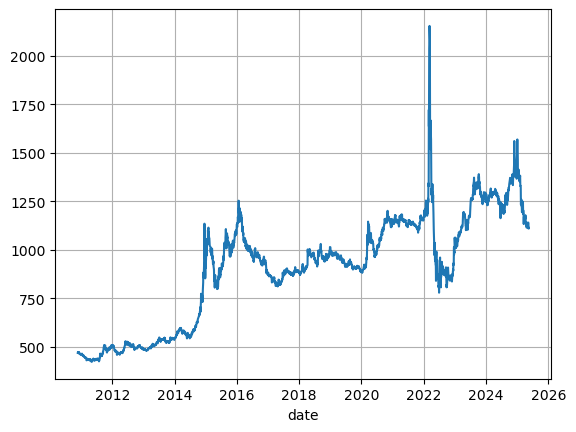

In [15]:
fx_cny_df[fx_cny_df.index >= datetime.date(datetime.strptime("20100101", "%Y%m%d"))]['RUB'].plot()
plt.grid()
plt.show()

***<font color=steel
    size=5
       face=雅黑>
<mark>中美实际利差</mark>
</font>***

In [18]:
#美联储利率
usa_interest_rate = ak.macro_bank_usa_interest_rate()
usa_interest_rate.columns = ['commodity', 'date', 'us_int_current', 'us_int_predict', 'us_int_previous']
usa_interest_rate['month'] = usa_interest_rate['date'].apply(lambda x: x.strftime('%Y%m'))
usa_int_conc = usa_interest_rate[['month', 'us_int_current']]
#print(usa_int_conc)
#美国CPI
usa_cpi = ak.macro_usa_cpi_yoy()
usa_cpi.columns = ['date', 'public_date', 'us_cpi_current', 'us_cpi_previous']
usa_cpi['month'] = usa_cpi['date'].apply(lambda x: x.strftime('%Y%m'))
usa_cpi_conc = usa_cpi[['month', 'us_cpi_current']]
#print(usa_cpi_conc)
#中国LPR
ts.set_token('d346f88cfb20095f252d7e1178197129c6cc300f67bf7e37a942d834')
pro = ts.pro_api()
china_interest_rate = pro.shibor_lpr(start_date='20000101', end_date='20240731', fields='date,1y')

china_interest_rate.columns = ['date', 'cn_int_current']
china_interest_rate['month'] = china_interest_rate['date'].apply(lambda x: x[:6])
china_int_conc = china_interest_rate[['month', 'cn_int_current']]
china_int_conc = china_int_conc.groupby(['month'])['cn_int_current'].mean().reset_index()
print(china_int_conc)
#中国CPI
china_cpi = ak.macro_china_cpi_yearly()
china_cpi.columns = ['commodity', 'date', 'cn_cpi_current', 'cn_cpi_predict', 'cn_cpi_previous']
china_cpi['month'] = china_cpi['date'].apply(lambda x: x.strftime('%Y%m'))
china_cpi_conc = china_cpi[['month', 'cn_cpi_current']]
#print(china_cpi)

#日本央行利率
jpn_interest_rate = ak.macro_bank_japan_interest_rate()
jpn_interest_rate.columns = ['commodity', 'date', 'jpn_int_current', 'jpn_int_predict', 'jpn_int_previous']
jpn_interest_rate['month'] = jpn_interest_rate['date'].apply(lambda x: x.strftime('%Y%m'))
jpn_int_conc = jpn_interest_rate[['month', 'jpn_int_current']]
#print(jpn_int_conc)
#欧洲央行利率
eur_interest_rate = ak.macro_bank_euro_interest_rate()
eur_interest_rate.columns = ['commodity', 'date', 'eur_int_current', 'eur_int_predict', 'eur_int_previous']
eur_interest_rate['month'] = eur_interest_rate['date'].apply(lambda x: x.strftime('%Y%m'))
eur_int_conc = eur_interest_rate[['month', 'eur_int_current']]
#print(eur_int_conc)

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\akshare\economic\macro_bank.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  big_df = pd.concat([big_df, temp_df], ignore_index=True)


      month  cn_int_current
0    201310        5.718000
1    201311        5.724286
2    201312        5.730000
3    201401        5.730000
4    201402        5.750000
..      ...             ...
125  202403        3.450000
126  202404        3.450000
127  202405        3.450000
128  202406        3.450000
129  202407        3.350000

[130 rows x 2 columns]


In [19]:
month_df = pd.DataFrame(pd.date_range('19820101', datetime.now().strftime('%Y%m%d'), periods=None, freq='MS'))
month_df.columns = ['month']
month_df['month'] = month_df['month'].apply(lambda x: x.strftime('%Y%m'))
init_conc = pd.merge(month_df, usa_int_conc, how='left', on='month')
conc_1 = pd.merge(init_conc, usa_cpi_conc, how='left', on='month')
conc_2 = pd.merge(conc_1, china_int_conc, how='left', on='month')
conc_3 = pd.merge(conc_2, jpn_int_conc, how='left', on='month')
conc_4 = pd.merge(conc_3, eur_int_conc, how='left', on='month')
final_conc = pd.merge(conc_4, china_cpi_conc, how='left', on='month')
final_conc = final_conc.fillna(method='ffill')          
final_conc['us_real_int'] = final_conc['us_int_current'] - final_conc['us_cpi_current']
final_conc['cn_real_int'] = final_conc['cn_int_current'] - final_conc['cn_cpi_current']
final_conc['real_int_gap'] = final_conc['us_real_int'] - final_conc['cn_real_int']
final_conc['nomi_int_gap_usa_chn'] = final_conc['us_int_current'] - final_conc['cn_int_current']
final_conc['nomi_int_gap_usa_jpn'] = final_conc['us_int_current'] - final_conc['jpn_int_current']
final_conc['nomi_int_gap_usa_eur'] = final_conc['us_int_current'] - final_conc['eur_int_current']

final_conc['cpi_gap_usa_chn'] = final_conc['us_cpi_current'] - final_conc['cn_cpi_current']
final_conc = final_conc.set_index(keys='month')

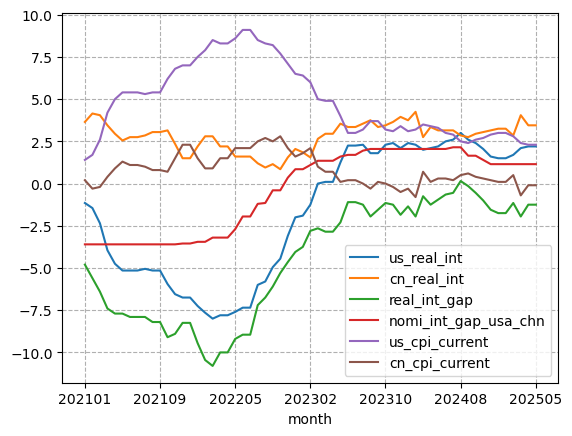

In [24]:
#final_conc[final_conc.index >= '201901'][['us_cpi_current', 'cn_cpi_current', 'cpi_gap_usa_chn']].plot()
final_conc[final_conc.index >= '202101'][['us_real_int', 'cn_real_int', 'real_int_gap', 'nomi_int_gap_usa_chn', 'us_cpi_current', 'cn_cpi_current']].plot()
#final_conc[final_conc.index >= '201901'][['us_int_current', 'cn_int_current', 'jpn_int_current', 'eur_int_current']].plot()
plt.grid(ls='--')

In [ ]:
#final_conc.tail(100)
#eur_interest_rate[(eur_interest_rate['month'] >= '201401') & (eur_interest_rate['month'] <= '201901')]
#china_int_conc[china_int_conc['month'] >= '201901'].tail(30)
#china_int_conc
china_int_conc.drop_duplicates()

***<font color=steel
    size=5
       face=雅黑>
<mark>中国房价指数</mark>
</font>***

Index(['日期', '城市', '新建商品住宅价格指数-同比', '新建商品住宅价格指数-环比', '新建商品住宅价格指数-定基',
       '二手住宅价格指数-环比', '二手住宅价格指数-同比', '二手住宅价格指数-定基'],
      dtype='object')


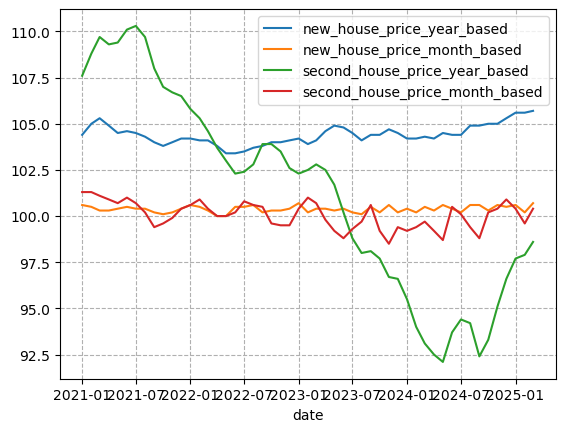

In [36]:
house_price_df = ak.macro_china_new_house_price()
print(house_price_df.columns)
house_price_df.columns = ['date', 'city', 
                                          'new_house_price_year_based', 'new_house_price_month_based', 'new_house_price_fixed_based',
                                          'second_house_price_year_based', 'second_house_price_month_based', 'second_house_price_fixed_based']
house_price_df = house_price_df.set_index(keys='date')

house_price_df[(house_price_df['city'] == '上海') &
(house_price_df.index >= datetime.date(datetime.strptime("20210101", "%Y%m%d")))][['new_house_price_year_based', 
'new_house_price_month_based',
'second_house_price_year_based',
'second_house_price_month_based']].plot()
plt.grid(ls='--')

In [56]:
house_price_df['city'].value_counts()

city
北京    171
上海    171
Name: count, dtype: int64

In [42]:
house_price_df[(house_price_df['city'] == '北京') &
(house_price_df.index >= datetime.date(datetime.strptime("20240101", "%Y%m%d")))][['new_house_price_year_based', 
'new_house_price_month_based',
'second_house_price_year_based',
'second_house_price_month_based']]#.sort_values(house_price_df.index, ascending=False).head(50)

,new_house_price_year_based,new_house_price_month_based,second_house_price_year_based,second_house_price_month_based
date,,,,
2025-03-01,94.3,99.8,97.9,100.5
2025-02-01,94.5,100.1,97.1,100.0
2025-01-01,94.3,99.6,96.2,100.1
2024-12-01,94.6,99.9,95.5,100.5
2024-11-01,94.7,99.5,93.8,100.9
2024-10-01,95.1,99.3,91.6,101.0
2024-09-01,95.4,99.3,89.7,98.7
2024-08-01,96.4,99.5,91.5,99.0
2024-07-01,96.7,99.5,92.8,100.0


***<font color=steel
    size=5
       face=雅黑>
<mark>CPI消费价格指数</mark>
</font>***

In [58]:
import akshare as ak
import matplotlib.pyplot as plt

In [98]:
ts_cpi = ts.get_loan_rate()
ts_cpi

UnicodeDecodeError: 'gbk' codec can't decode byte 0x86 in position 142: illegal multibyte sequence

In [59]:
cpi_monthly = ak.macro_china_cpi_monthly()
print(cpi_monthly)

            商品          日期   今值  预测值   前值
0    中国CPI月率报告  1996-02-01  2.1  NaN  NaN
1    中国CPI月率报告  1996-03-01  2.3  NaN  2.1
2    中国CPI月率报告  1996-04-01  0.6  NaN  2.3
3    中国CPI月率报告  1996-05-01  0.7  NaN  0.6
4    中国CPI月率报告  1996-06-01 -0.5  NaN  0.7
..         ...         ...  ...  ...  ...
348  中国CPI月率报告  2025-01-12  NaN  NaN -0.6
349  中国CPI月率报告  2025-02-09  0.7  0.8  0.0
350  中国CPI月率报告  2025-03-09 -0.2 -0.1  0.7
351  中国CPI月率报告  2025-04-10 -0.4 -0.2 -0.2
352  中国CPI月率报告  2025-05-10  0.1  NaN -0.4

[353 rows x 5 columns]


<Axes: >

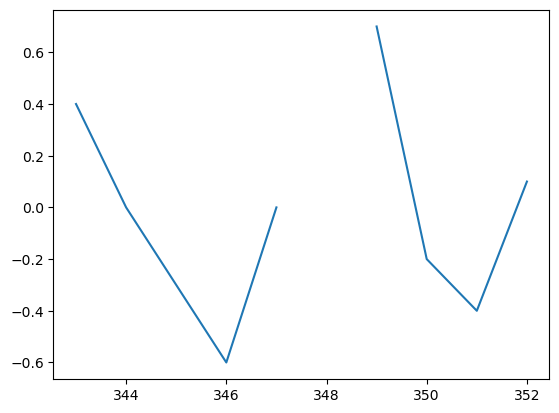

In [60]:
cpi_monthly['今值'].tail(10).plot()

In [61]:
print(cpi_monthly.tail(10))

            商品          日期   今值  预测值   前值
343  中国CPI月率报告  2024-09-09  0.4  0.5  0.5
344  中国CPI月率报告  2024-10-13  0.0  0.4  0.4
345  中国CPI月率报告  2024-11-09 -0.3  NaN  0.0
346  中国CPI月率报告  2024-12-09 -0.6 -0.4 -0.3
347  中国CPI月率报告  2025-01-09  0.0  0.0 -0.6
348  中国CPI月率报告  2025-01-12  NaN  NaN -0.6
349  中国CPI月率报告  2025-02-09  0.7  0.8  0.0
350  中国CPI月率报告  2025-03-09 -0.2 -0.1  0.7
351  中国CPI月率报告  2025-04-10 -0.4 -0.2 -0.2
352  中国CPI月率报告  2025-05-10  0.1  NaN -0.4


In [62]:
cpi_yearly = ak.macro_china_cpi_yearly()
#print(cpi_yearly)
cpi_yearly.tail(20)

,商品,日期,今值,预测值,前值
453,中国CPI年率报告,2023-11-09,-0.2,-0.1,0.0
454,中国CPI年率报告,2023-12-09,-0.5,-0.1,-0.2
455,中国CPI年率报告,2024-01-12,-0.3,-0.4,-0.5
456,中国CPI年率报告,2024-02-08,-0.8,-0.5,-0.3
457,中国CPI年率报告,2024-03-09,0.7,0.3,-0.8
458,中国CPI年率报告,2024-04-11,0.1,0.4,0.7
459,中国CPI年率报告,2024-05-11,0.3,0.1,0.1
460,中国CPI年率报告,2024-06-12,0.3,0.4,0.3
461,中国CPI年率报告,2024-07-10,0.2,0.4,0.3
462,中国CPI年率报告,2024-08-09,0.5,0.3,0.2


In [63]:
ppi_yearly = ak.macro_china_ppi_yearly()
print(ppi_yearly)

            商品          日期    今值  预测值    前值
0    中国PPI年率报告  1995-08-01  13.5  NaN   NaN
1    中国PPI年率报告  1995-09-01  13.0  NaN  13.5
2    中国PPI年率报告  1995-10-01  12.9  NaN  13.0
3    中国PPI年率报告  1995-11-01  12.5  NaN  12.9
4    中国PPI年率报告  1995-12-01  11.1  NaN  12.5
..         ...         ...   ...  ...   ...
354  中国PPI年率报告  2025-01-12   NaN  NaN  -2.5
355  中国PPI年率报告  2025-02-09  -2.3 -2.2  -2.3
356  中国PPI年率报告  2025-03-09  -2.2 -2.0  -2.3
357  中国PPI年率报告  2025-04-10  -2.5 -2.3  -2.2
358  中国PPI年率报告  2025-05-10  -2.7 -2.7  -2.5

[359 rows x 5 columns]


In [64]:
print(ppi_yearly.tail())

            商品          日期   今值  预测值   前值
354  中国PPI年率报告  2025-01-12  NaN  NaN -2.5
355  中国PPI年率报告  2025-02-09 -2.3 -2.2 -2.3
356  中国PPI年率报告  2025-03-09 -2.2 -2.0 -2.3
357  中国PPI年率报告  2025-04-10 -2.5 -2.3 -2.2
358  中国PPI年率报告  2025-05-10 -2.7 -2.7 -2.5


In [65]:
cpi_yearly_df = cpi_yearly[['日期', '今值']]
cpi_yearly_df.columns = ['date', 'cpi_yearly']
cpi_yearly_df = cpi_yearly_df.set_index(keys='date')

In [66]:
print(cpi_yearly_df)

            cpi_yearly
date                  
1986-02-01         7.1
1986-03-01         7.1
1986-04-01         7.1
1986-05-01         7.1
1986-06-01         7.1
...                ...
2025-01-12         NaN
2025-02-09         0.5
2025-03-09        -0.7
2025-04-10        -0.1
2025-05-10        -0.1

[473 rows x 1 columns]


In [67]:
ppi_yearly_df = ppi_yearly[['日期', '今值']]
ppi_yearly_df.columns = ['date', 'ppi_yearly']
ppi_yearly_df = ppi_yearly_df.set_index(keys='date')

In [68]:
print(ppi_yearly_df)

            ppi_yearly
date                  
1995-08-01        13.5
1995-09-01        13.0
1995-10-01        12.9
1995-11-01        12.5
1995-12-01        11.1
...                ...
2025-01-12         NaN
2025-02-09        -2.3
2025-03-09        -2.2
2025-04-10        -2.5
2025-05-10        -2.7

[359 rows x 1 columns]


In [69]:
import pandas as pd
data = pd.merge(cpi_yearly_df, ppi_yearly_df, how='inner', on='date')

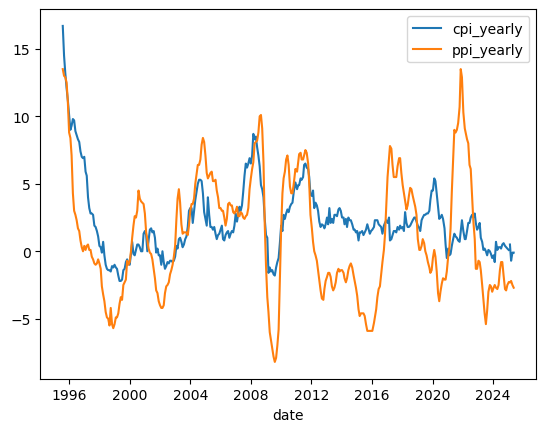

In [70]:
data.plot()
plt.show()

In [71]:
data['cpi_200'] = data['cpi_yearly'].shift(200)
data['ppi_200'] = data['ppi_yearly'].shift(200)
data.head()

,cpi_yearly,ppi_yearly,cpi_200,ppi_200
date,,,,
1995-08-01,16.7,13.5,NaN,NaN
1995-09-01,14.5,13.0,NaN,NaN
1995-10-01,13.2,12.9,NaN,NaN
1995-11-01,12.1,12.5,NaN,NaN
1995-12-01,11.2,11.1,NaN,NaN


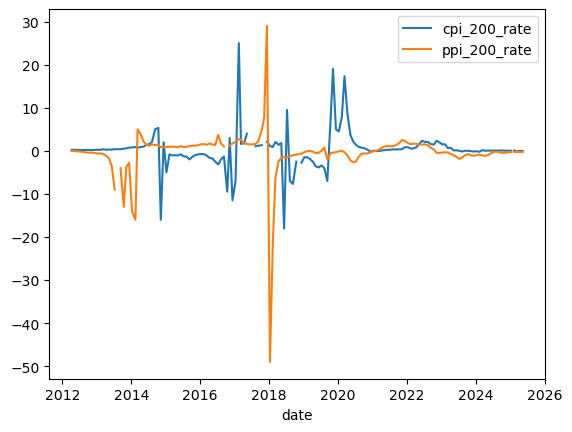

In [72]:
data['cpi_200_rate'] = data['cpi_yearly'] / data['cpi_200']
data['ppi_200_rate'] = data['ppi_yearly'] / data['ppi_200']
data[['cpi_200_rate','ppi_200_rate']].plot()
plt.show()

***<font color=steel
    size=5
       face=雅黑>
<mark>货币供应量</mark>
</font>***

In [74]:
#存款准备金率
#国债逆回购
#LPR
#国债收益率

***<font color=steel
    size=5
       face=雅黑>
<mark>宏观杠杆率</mark>
</font>***

In [92]:
#多因子数据
import akshare as ak

article_ff_crr_df = ak.article_ff_crr()
print(article_ff_crr_df)

                                           item December  2024 Last 3  Months  \
0                Fama/French 3 Research Factors              -              -   
1                                         Rm-Rf          -3.17           2.15   
2                                           SMB          -2.73           0.33   
3                                           HML          -2.95          -2.25   
4          Fama/French 5 Research Factors (2x3)              -              -   
5                                         Rm-Rf          -3.17           2.15   
6                                           SMB          -3.87          -0.61   
7                                           HML          -2.95          -2.25   
8                                           RMW           1.82          -2.03   
9                                           CMA          -1.10          -2.16   
10              Fama/French Research Portfolios              -              -   
11           Size and Book-t